
   # Анализ для планирования рекламной кампании на 2017 год

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, планирует рекламную кампанию на 2017 год. 
Целью данного проекта является выявление закономерностей, определяющие успешность игры. Это позволит сделать ставку на потенциально популярные продукты и получить хорошие результаты от рекламной кампании.


## Содержание проекта

* [1. Общая информация о файлах с данными](#chapter1)
* [2. Подготовка данных](#chapter2)
    * [2.1 Замена названия столбцов и типов данных](#section_2_1)
    * [2.2 Обработка пропусков](#section_2_2)
    * [2.3 Суммарные продажи во всех регионах](#section_2_3)
* [3. Анализ данных](#chapter_3)
    * [3.1 Количество игр в разные годы](#section_3_1)
    * [3.2 Изменение продаж по платформам по годам](#section_3_2)
    * [3.3 Анализ актуального периода](#section_3_3)
* [4. Портрет пользователя каждого региона](#chapter_4)
    * [4.1 Самые популярные платформы](#section_4_1)
    * [4.2 Самые популярные жанры](#section_4_2) 
    * [4.3 Рейтинг ESRB и продажи](#section_4_3) 
* [5. Проверка гипотез](#chapter_5)
    * [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section_5_1)
    * [5.2 Средние пользовательские рейтинги жанров Action и Sports разные](#section_5_2)

* [6. Общий вывод](#chapter_6)



# 1. Общая информация о файлах с данными  <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В данном файле содержатся исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (млн проданных копий)
    EU_sales — продажи в Европе (млн проданных копий)
    JP_sales — продажи в Японии (млн проданных копий)
    Other_sales — продажи в других странах (млн проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


В некоторых столбцах присутствуют нулевые значения. Пропуски в столбце 'Year_of_Release' могут быть связаны с тем, что по каким-то играм в данной таблице не были собраны эти данные. Пропуски в столбце 'Rating' могут быть связаны с тем, что не все игры в принципе имеют рейтинг от организации ESRB. Пропущенные значения в 'Critic_Score', 'User_Score' могут быть также связаны с тем, что произошла ошибка при формировании таблицы, однако возможно, что на оценку критикам и пользователям были предложены не все игры, соответственно, некоторые игры не имеют этой оценки.

Рассмотрим более подробно значения столбца Rating

In [5]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

    «E» («Everyone») — «Для всех»
    «T» («Teen») — «Подросткам»
    «M» («Mature») — «Для взрослых»
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    «EC» («Early childhood») — «Для детей младшего возраста»
    «RP» («Rating Pending») — «Рейтинг ожидается»
    «AO» («Adults Only 18+») — «Только для взрослых»


# 2. Подготовка данных  <a class="anchor" id="chapter2"></a>

### Замена названия столбцов и изменение типов данных <a class="anchor" id="section_2_1"></a>

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='ignore')

Произвели на численный тип данны для столбцов с оценкой пользователей и критиков, а также с годом.

### Обработка пропусков <a class="anchor" id="section_2_2"></a> 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбце name невозможно заполнить исходя из имеющихся данных. Оставим этот столбец незаполненным для 3 записей, возможно, далее удалим их вовсе.

In [12]:
data[data['year_of_release'].isna()].shape

(269, 11)

Пропуски в столбце year_of_release составляют около 1.6 %. Их удаление не приведет к существенной потере данных; заполнение же вручную займет значительное количество времени.

In [13]:
data.dropna(subset=['year_of_release'], inplace=True)

In [14]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как оказалось, пропущенные значения в столбце genre совпадают с пропущенными значениями в столбце name. Удалим эти 2 записи.

In [15]:
data.dropna(subset=['genre'], inplace=True)

В почти половине записей отсуствует информация в столбце critic_score. Это значит, что просто удалить такие строки в данном случае невозможно. Аналогично с пропусками в столбце user_score - их количество составляет 6605. В данном случае оставим эти поля незаполненными, так как заполнение каким-то значением может исказить результаты статистического анализа.

Значение K-A больше не присутсвует в шкале ESRB; в 1998 году оно было заменено на E.

In [16]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [17]:
data[data['rating'].isna()].shape[0]

6676

В столбце rating присутствуют часть пропущенных значений. Нужно отметить, что шкала ESRB была основана в 1994 году, соответственно, игры до этого года не могли получить в принципе какой-либо рейтинг. Заменим пропущенные значения в таком случае строкой 'didnt exist'.

In [18]:
data.loc[(data['year_of_release'] < 1994) & data['rating'].isna(), 'rating'] = 'didnt exist'

Оставшиеся пропуски в этом столбце заполним значением doesnt have.

In [19]:
data['rating'].fillna('doesnt have', inplace=True)

In [20]:
data[data['user_score'] == 'tbd'].replace('tbd', None)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Значения tbd в столбце 'user_score' означают, что рейтинг еще не был сформирован. Заменим их пропущенными значениями.

In [21]:
data['user_score'].replace('tbd', None, inplace=True)
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

### Суммарные продажи во всех регионах  <a class="anchor" id="section_2_3"></a> 

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] +  data['jp_sales'] + data['other_sales']

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,didnt exist,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,doesnt have,31.38


# 3. Исследовательский анализ данных  <a class="anchor" id="chapter_3"></a> 

### Количество игр в разные годы <a class="anchor" id="section_3_1"></a> 

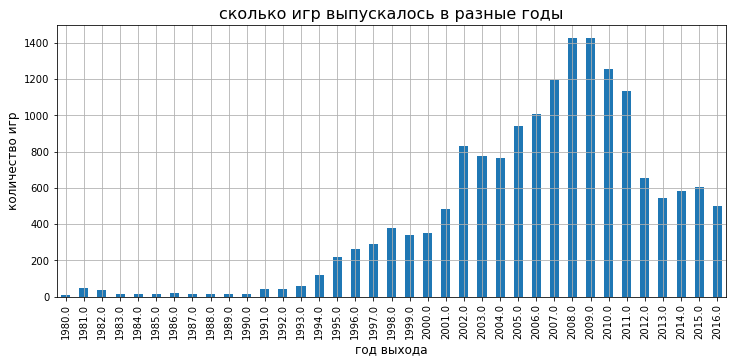

In [24]:
plt.figure(figsize=(12, 5))
data.groupby([data["year_of_release"]])['name'].count().plot(kind="bar", grid=True)
plt.xlabel('год выхода', fontsize=12)
plt.ylabel('количество игр', fontsize=12)
plt.title('сколько игр выпускалось в разные годы', fontsize=16)
plt.show()

На графике выше видно, что количество игр ранее 1995 года является незначительным. Более того, рынок с тех пор значительно изменился: при планировании кампании на 2017 год данные 1980-х явно являются неактуальными. Посмотрим более подробно распределение годов на боксплоте.

<div class="alert alert-info">    
У меня есть несколько идей, c чем связан спад в индустрии последних лет:
    
1) Сегодня ожиданий пользователей от игр выше - графика, сюжет, геймплей и тд. Студии предпочитают вкладываться в меньшее количество игр, делая их более качественно (соответственно, выпуская реже, тк требуются ресурсы и время).
    
2) На графике видно, что падение началось после 2008 года, в который произошел всемирный кризис: тут могли и не выдержать кризиса многие студии, и люди сократить свои расходы на развлечения.
    
3) Данный период совпал с периодом "отмирания" нескольких платформ и только начала появления новых - а это время, в которое не производится большого количества игр.
    </div>

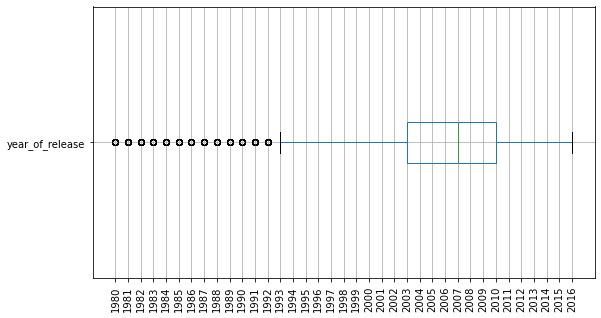

In [25]:
plt.figure(figsize=(9, 5))
data["year_of_release"].plot(kind='box', grid=True, vert=False)
plt.xticks(range(1980, 2017), rotation=90)
plt.show()

Действительно, игры, выпущенные ранее 1993 года, на боксплоте представлены как выбросы. Таким образом, можно сделать вывод, что нам не важны данные за все представленные периоды. 

### Изменение продаж по платформам по годам.  <a class="anchor" id="section_3_2"></a> 

In [26]:
top_5_sales = data.groupby([data["platform"]])['total_sales'].sum().sort_values(ascending=False).head(5)

In [27]:
top_names_5 = list(top_5_sales.index)
top_names_5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

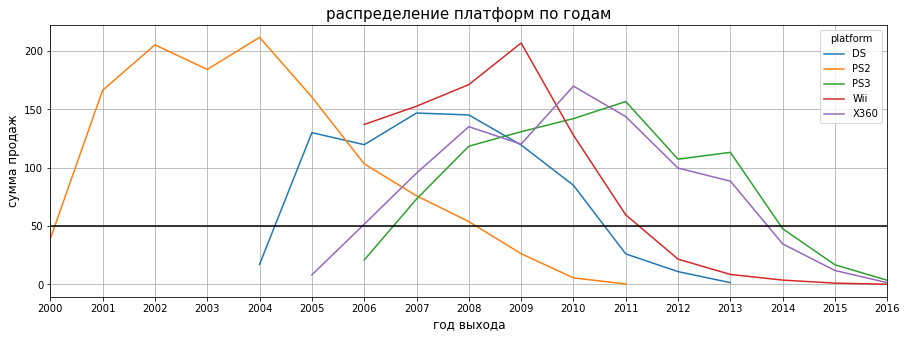

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
data.query('platform in (@top_names_5)').pivot_table(index='year_of_release', 
                                                   columns='platform', 
                                                   values='total_sales',
                                                   aggfunc='sum'
                                                  ).plot(ax=ax, grid=True)
plt.xlabel('год выхода', fontsize=12)
plt.ylabel('сумма продаж', fontsize=12)
plt.title('распределение платформ по годам', fontsize=15)
plt.xlim(2000, 2016)
plt.axhline(y = 50, color='black')
plt.xticks(range(2000, 2017))
plt.show()

На графике выше показано распределение по годам суммарных продаж 5 платформ. 
Можно говорить о том, что  характерным сроком, в течение которого появляются новые и исчезают старые платформы, приблизительно является срок в 10 лет. 

Однако стоит отметить, что почти для всех платформ отрезок графика, иллюстрирующий "исчезание" этой платформы является довольно растянутым. Возможно, имеет смысл сократить отрезок в 10 лет до меньшего значения. Это особенно важно для цели нашего проекта - планирования продаж - так как вкладываться в рекламные кампании уже "исчезающих" платформ не целесообразно.

На графике порог, иллюстрирующий потерю популярности платформы показан черной линией. Если ориентироваться по нему на продолжительности "жизни" платформы, то в среднем это значение составляет около 7 лет. Так как мы планируем кампанию на 2017 год, то, соответственно, нас интересуют данные начиная с 2010 года.

In [29]:
length = data.groupby([data["platform"]])['year_of_release'].agg(['min', 'max'])
length.head()

,min,max
platform,,
2600,1980.0,1989.0
3DO,1994.0,1995.0
3DS,2011.0,2016.0
DC,1998.0,2008.0
DS,1985.0,2013.0


In [30]:
length['duration'] = length['max'] - length['min']

In [31]:
length['duration'].median(), length['duration'].mean()

(6.0, 7.612903225806452)

In [32]:
data['year_of_release'].quantile(0.7)

2010.0

Может показаться, что мы потеряли значительную часть данных для дальнейшего анализа. Однако те данные уже не отражают ситуацию на рынке на текущий момент, поэтому целесообразно отбросить их.

In [33]:
actual_data = data[data['year_of_release'] >= 2010]
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,doesnt have,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


## Анализ за актуальный период  <a class="anchor" id="section_3_3"></a> 

### Какие платформы лидируют по продажам, растут или падают? 

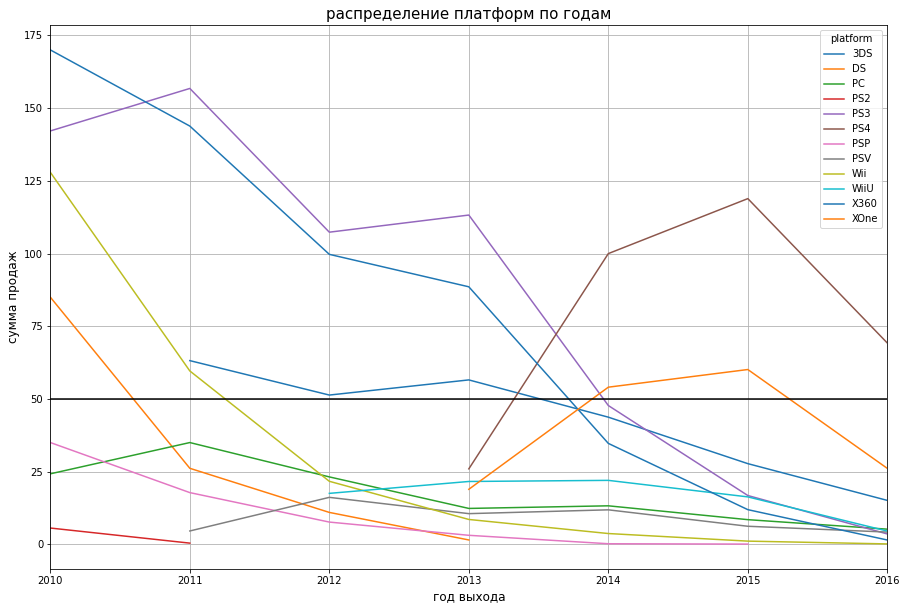

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
actual_data.pivot_table(index='year_of_release', 
                                                   columns='platform', 
                                                   values='total_sales',
                                                   aggfunc='sum'
                                                  ).plot(ax=ax, grid=True)
plt.xlabel('год выхода', fontsize=12)
plt.ylabel('сумма продаж', fontsize=12)
plt.title('распределение платформ по годам', fontsize=15)
plt.xlim(2010, 2016)
plt.axhline(y = 50, color='black')
plt.xticks(range(2010, 2017))
plt.show()

На графике выше представлены суммарные продаж для платформ, на которые выходили игры после 2010 года. На данный момент на графике представлен слишком много платформ, графики пересекаются и становятся менее информативными. Для начала определим те платформы, вкладываться в которые в 2016-17 годах уже не имеет смысла. 

Так, есть платформы, которые 'исчезли' за этот период: PS2, DS, PSP. Также есть платформы, у которых еще в 2010 году началось падение, и с каждым годом продажи на них становятся только меньше: Wii, X360. Внесем вышеназванные платформы в список неинтересующих нас платформ, и построим новый график.

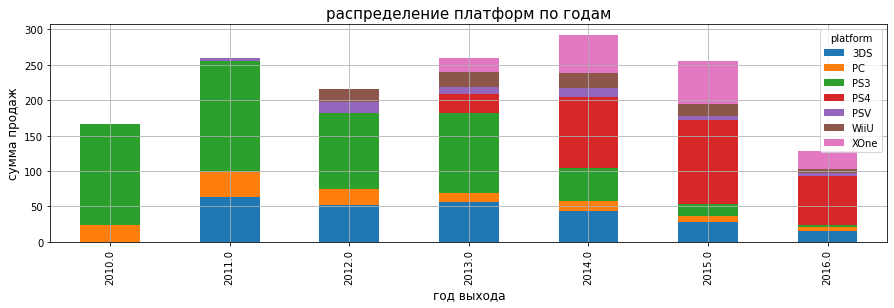

In [35]:
not_actual_list = ['PS2', 'DS', 'PSP', 'Wii', 'X360']
fig, ax = plt.subplots(figsize=(15, 4))
actual_data.query('platform not in (@not_actual_list)').pivot_table(index='year_of_release', 
                                                   columns='platform', 
                                                   values='total_sales',
                                                   aggfunc='sum'
                                                  ).plot(kind='bar',stacked = True, ax=ax, grid=True)
plt.xlabel('год выхода', fontsize=12)
plt.ylabel('сумма продаж', fontsize=12)
plt.title('распределение платформ по годам', fontsize=15)
plt.show()

На графике наглядно видно, что на 2016 год лидирующими являются следующие платформы: 

    1) PS4
    2) XOne
    3) 3DS
Однако, несмотря на то, что они явяляются лидирующими, они не являются растущими. Но стоит отметить, что падение в продажах для платформ PS4 и XOne началось тоолько в 2015 году. Зная, что период падения в продажах более растянут во времени (по сравнению с периодом роста), можно предположить,что пройдет еще достаточное время до их 'исчезновения'. Более того, они значительно превышают по объему продаж другие платформы, соответстенно, имеет смысл выделить эти 3 платформы как потенциально прибыльные.


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [36]:
interesting_platforms = ['PS4', 'XOne', '3DS']

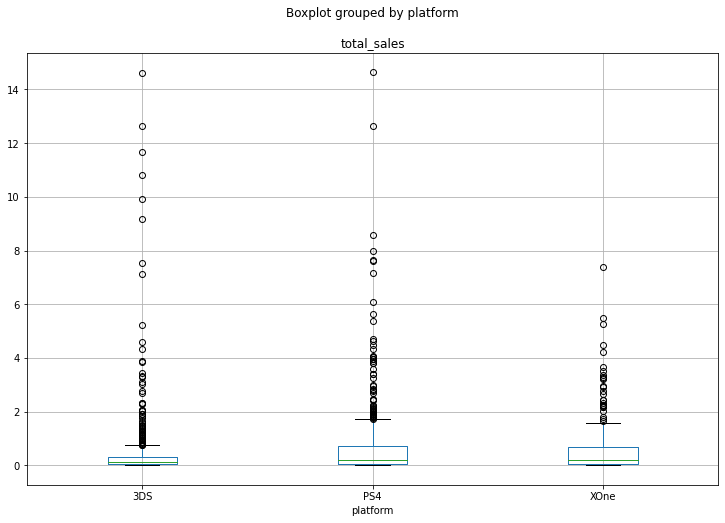

In [37]:
actual_data.query('platform in (@interesting_platforms)').boxplot(['total_sales'], by='platform', figsize=(12,8))
plt.show()

Медианная стоимость глобальных продаж выше всего на платформе XOne. Интересно, что наличие больших выбросов характерно для платформ с меньшей медианной стоимостью глобальных продаж - PS4 и 3DS. 

<div class="alert alert-info">   
Такие выбросы для платформ 3DS и PS4 могут быть связаны с тем, что количество эксклюзивных игр на них больше, чем на XOne. Также стоит учитывать, что количество пользователей этих платформ может различаться. Также стоит учитывать, что некоторые из этих платформ портативные, а другие - настольные.
    </div>

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. 

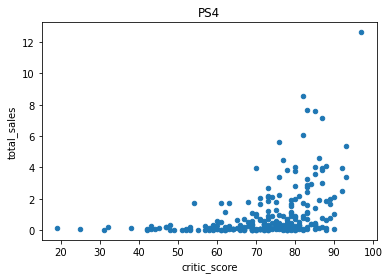

Корреляция между оценкой критиков и продажами для платформы PS4 равна: 0.40656790206178095


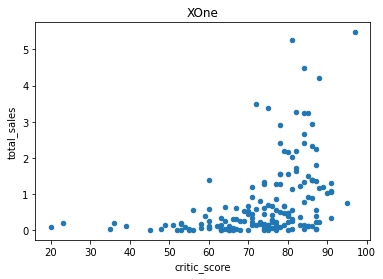

Корреляция между оценкой критиков и продажами для платформы XOne равна: 0.4169983280084017


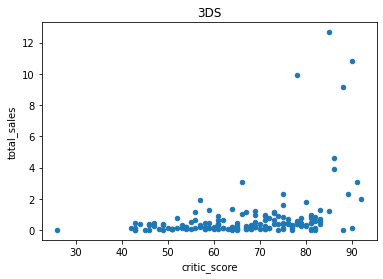

Корреляция между оценкой критиков и продажами для платформы 3DS равна: 0.3487397305984834


In [38]:
for name in interesting_platforms:
    actual_data.query('platform == @name').plot(kind ='scatter', x='critic_score', y='total_sales')
    plt.title(name)
    plt.show()
    print('Корреляция между оценкой критиков и продажами для платформы {} равна:'.format(name), 
          actual_data.query('platform == @name')['critic_score'].corr(
              actual_data.query('platform == @name')['total_sales']))

Коэффициент корреляции между оценкой критиков и продажами для 3 интересующих нас платформ является слабым. На графиках видно, что существуют игры с одинаковым уровнем продаж, при этом их оценка критиков значительно отличается. Тем не менее, явно видно, что для игр с высокими уровнем продаж характерна более высокая оценка критиков. 

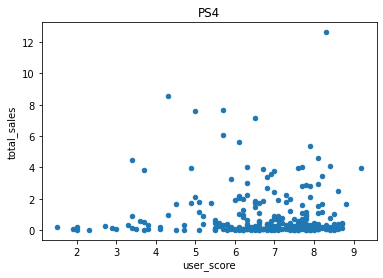

Корреляция между оценкой пользователей и продажами для платформы PS4 равна: -0.027427851974847168


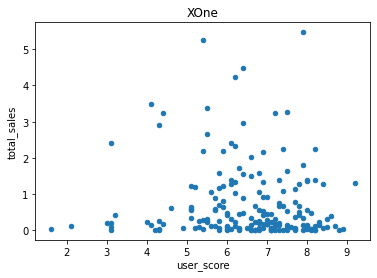

Корреляция между оценкой пользователей и продажами для платформы XOne равна: -0.07050537515177652


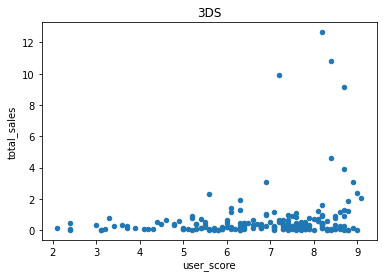

Корреляция между оценкой пользователей и продажами для платформы 3DS равна: 0.2008337164259149


In [39]:
for name in interesting_platforms:
    actual_data.query('platform == @name').plot(kind ='scatter', x='user_score', y='total_sales')
    plt.title(name)
    plt.show()
    print('Корреляция между оценкой пользователей и продажами для платформы {} равна:'.format(name), 
          actual_data.query('platform == @name')['user_score'].corr(
              actual_data.query('platform == @name')['total_sales']))

Коэффициент корреляции между оценкой критиков и продажами для 3 интересующих нас платформ является очень слабым. На графиках видно, что существуют игры с одинаковым уровнем продаж, при этом их оценка пользователей значительно отличается. Так, для платформы XOne наиболее высокий уровень продаж у игр с рейтингом 5 и 8. Таким образом, можно сказать, что высокая оценка критиков чаще характерна для игр с высокими продажами, чем высокая оценка пользователей.

Для того, чтобы понять является ли такая диаграмма рассеивания и корелляция характерной только для выбранных нами платформ, проанализируем тем же способом еще 3 платформы: PS3, PC, WiiU. (следующие 3 платформы по объему продаж)

In [40]:
another_platforms = ['PS3', 'PC', 'WiiU' ]

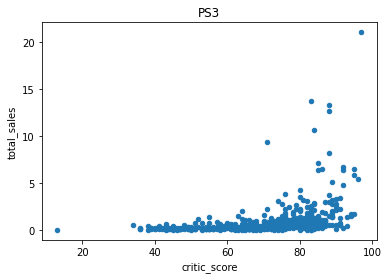

Корреляция между оценкой критиков и продажами для платформы PS3 равна: 0.4005940935202247


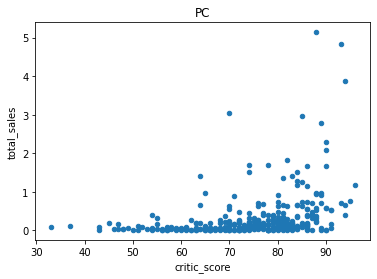

Корреляция между оценкой критиков и продажами для платформы PC равна: 0.3364970713018004


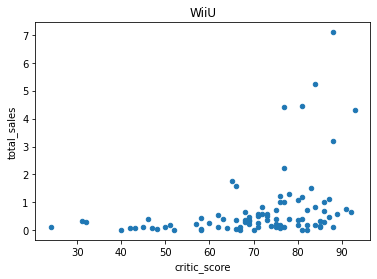

Корреляция между оценкой критиков и продажами для платформы WiiU равна: 0.34837976012017485


In [41]:
for name in another_platforms:
    actual_data.query('platform == @name').plot(kind ='scatter', x='critic_score', y='total_sales')
    plt.title(name)
    plt.show()
    print('Корреляция между оценкой критиков и продажами для платформы {} равна:'.format(name), 
          actual_data.query('platform == @name')['critic_score'].corr(
              actual_data.query('platform == @name')['total_sales']))

Для этих 3 платформ корреляция между оценкой критиков и продажами является слабой (аналогичный результат для интересующих нас платформ). Диаграммы рассеивания также схожи: на графиках видно, что игры с более высокими продажами обладают более высокой оценкой критиков. Однако существуют игры с довольно низким уровнем продаж, обладающие как высоким, так и низким рейтингом.

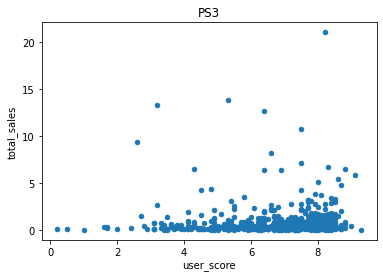

Корреляция между оценкой пользователей и продажами для платформы PS3 равна: 0.06430897260844627


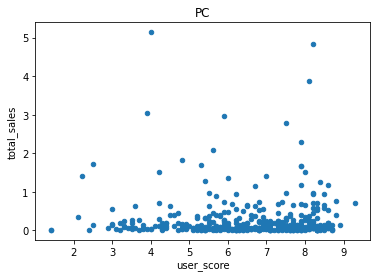

Корреляция между оценкой пользователей и продажами для платформы PC равна: -0.014401198082225574


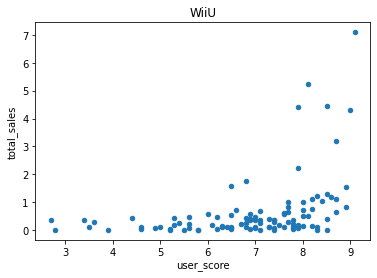

Корреляция между оценкой пользователей и продажами для платформы WiiU равна: 0.39823032938591246


In [42]:
for name in another_platforms:
    actual_data.query('platform == @name').plot(kind ='scatter', x='user_score', y='total_sales')
    plt.title(name)
    plt.show()
    print('Корреляция между оценкой пользователей и продажами для платформы {} равна:'.format(name), 
          actual_data.query('platform == @name')['user_score'].corr(
              actual_data.query('platform == @name')['total_sales']))

Для первых 2 платформ (PS3 и PC) корреляция между оценкой пользователей и продажами является очень слабой (аналогичный результат для интересующих нас платформ). Диаграммы рассеивания также схожи: на графиках нет явного роста количества продаж одновременно с оценкой пользователей. 
Однако для платформы WiiU корелляция выше. Здесь уже прослеживается рост количества продаж вместе с ростом оценкой пользователей.

Таким образом, продажи внутри популярных платформ и их соотношение с оценкой пользователей и критиков не является каким-то особенным. Уровень корелляции и граифики рассеивания схожи с результатами, полученными для других платформ.

<div class="alert alert-info">
Тот факт, что для высоких оценок критиков характерны более высокие продажи может быть связан с тем, что критики имеют шанс оценить игру до выпуска ее в продажу. Так, люди видя высокий рейтинг критиков, покупают ее, однако не факт, что они в дальнейшем оценят ее также высоко.
</div>

### Общее распределение игр по жанрам


In [43]:
genre_sales = actual_data.groupby('genre')['total_sales'].sum()

In [44]:
genre_sales.sort_values(ascending=False)

genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: total_sales, dtype: float64

In [45]:
import matplotlib.colors

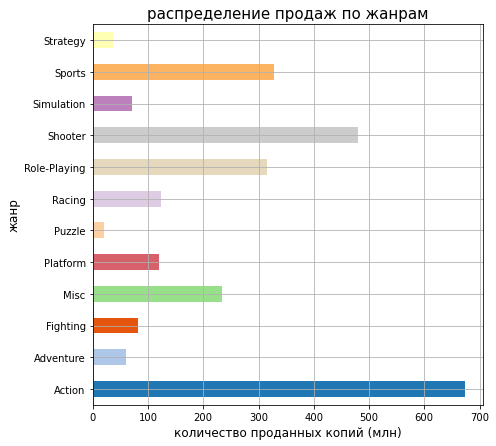

In [46]:
plt.figure(figsize=(7, 7))
genre_sales.plot(kind='barh', grid=True, 
                 color = [plt.cm.tab20(0),plt.cm.tab20(1),plt.cm.tab20c(4),
          plt.cm.tab20(5),plt.cm.tab20b(14),plt.cm.tab20c(7), plt.cm.Pastel1(3), plt.cm.Pastel1(6),
                          plt.cm.Pastel2(9), plt.cm.Set3(9), plt.cm.Set3(5), plt.cm.Set3(1),])
plt.title('распределение продаж по жанрам', fontsize=15)
plt.xlabel('количество проданных копий (млн)', fontsize=12)
plt.ylabel('жанр', fontsize=12)
plt.show()

Выше всего продажи у следующих жанров: Action, Shooter, Sports; а ниже всего - Puzzle, Strategy, Adventure. Продажи игр в жанре Action составляют больше четверти относительно всех продаж. Три наименее прибыльных жанра составляют лишь 4 процента от всех продаж.

Важно понимать, связана ли высокая/низкая доля продаж того или иного жанра с тем, что количество игр в этом жанре больше/меньше. 

In [47]:
genre_num = actual_data.groupby('genre')['total_sales'].count()

In [48]:
genre_num.sort_values(ascending=False)

genre
Action          1495
Misc             576
Sports           575
Role-Playing     568
Adventure        563
Shooter          410
Racing           237
Simulation       217
Fighting         199
Strategy         170
Platform         153
Puzzle           114
Name: total_sales, dtype: int64

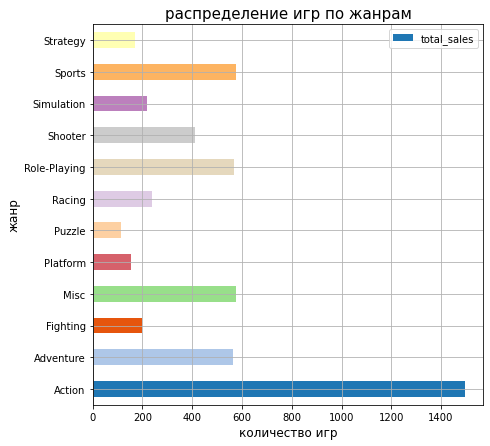

In [49]:
plt.figure(figsize=(7, 7))
genre_num.plot(kind='barh', grid=True, legend=True, 
                 color = [plt.cm.tab20(0),plt.cm.tab20(1),plt.cm.tab20c(4),
          plt.cm.tab20(5),plt.cm.tab20b(14),plt.cm.tab20c(7), plt.cm.Pastel1(3), plt.cm.Pastel1(6),
                          plt.cm.Pastel2(9), plt.cm.Set3(9), plt.cm.Set3(5), plt.cm.Set3(1),])
plt.title('распределение игр по жанрам', fontsize=15)
plt.xlabel('количество игр', fontsize=12)
plt.ylabel('жанр', fontsize=12)
plt.show()

Наибольшее количество игр в следующих жанрах: Action, Misc, Sports. Наименьшее количество - в жанре Puzzle, Platform, Strategy.

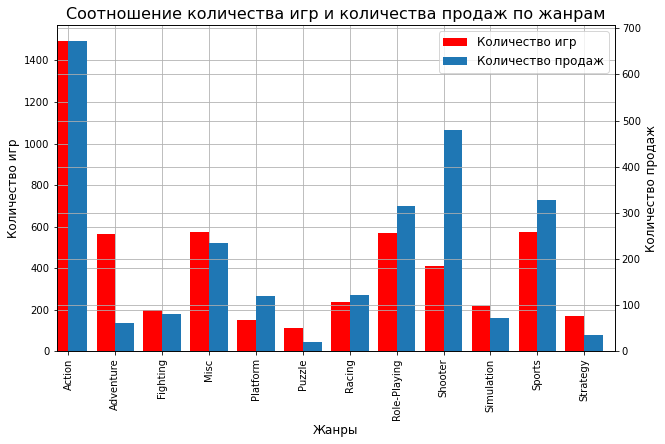

In [50]:
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

genre_num.plot(kind='bar', grid=True, ax=ax, width=width, position=1, color='red', 
               label='Количество игр')
genre_sales.plot(kind='bar', grid=True, stacked = True, ax=ax2, width=width, 
                 position=0, label='Количество продаж')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=1, fontsize=12)

ax.set_ylabel('Количество игр', fontsize=12)
ax2.set_ylabel('Количество продаж', fontsize=12)
ax.set_xlabel('Жанры', fontsize=12)
ax.set_title('Соотношение количества игр и количества продаж по жанрам', fontsize=16)
plt.show()

Таким образом, наиболее прибыльный жанр является одновременно и самым распространенным - это жанр Action. Схожа ситуация и с наименее прибыльным жанром - Puzzle - в этом жанре представлено наименьшее количество игр. Однако не всегда количество продаж связано с количеством игр. Так, жанр Action не входит в топ-3 наименее популярных по количество игру, однако входит в топ-3 наименее прибыльных жанров. Важно понимать, что причиной высокого количества продаж того или иного жанра может быть связано с количеством существующих игр в этом жанре.

# 4. Портрет пользователя каждого региона <a class="anchor" id="chapter_4"></a> 


### Самые популярные платформы (топ-5). <a class="anchor" id="section_4_1"></a> 

In [51]:
platforms_regions = actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

In [52]:
print('Наиболее популярные платформы в Северной Америке:', 
      list(platforms_regions.sort_values(by='na_sales', ascending=False)['na_sales'].head().index))
print('Наиболее популярные платформы в Европе:', 
      list(platforms_regions.sort_values(by='eu_sales', ascending=False)['eu_sales'].head().index))
print('Наиболее популярные платформы в Японии:', 
      list(platforms_regions.sort_values(by='jp_sales', ascending=False)['jp_sales'].head().index))




Наиболее популярные платформы в Северной Америке: ['X360', 'PS3', 'Wii', 'PS4', 'XOne']
Наиболее популярные платформы в Европе: ['PS3', 'X360', 'PS4', 'PC', 'Wii']
Наиболее популярные платформы в Японии: ['3DS', 'PS3', 'PSP', 'DS', 'PSV']


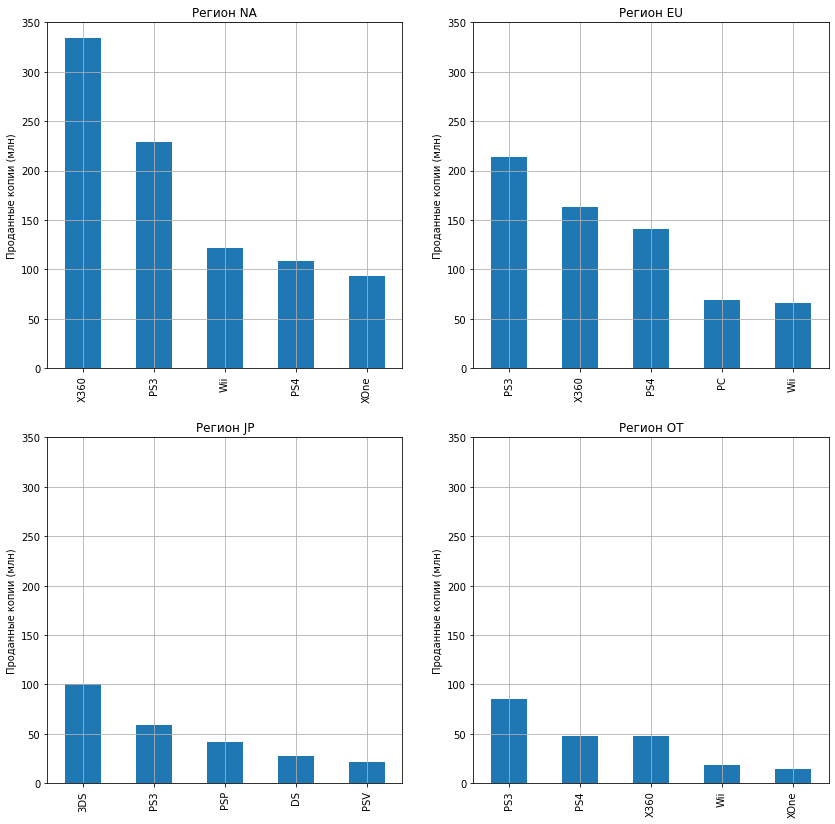

In [53]:
plt.figure(figsize=(14, 14))

for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    top_platforms = platforms_regions[region].sort_values(ascending=False).head(5)
    top_platforms.plot(kind='bar', grid=True)
    
    plt.title('Регион {}'.format(region[:2].upper()))
    plt.xlabel('')
    plt.ylabel('Проданные копии (млн)')
    plt.ylim(0, 350)
    
plt.show()

На графиках выше показаны самые популярные платформы (топ-5) для всех регионов. Наиболее популярные платформы различны во всех регионах. Платформа PS3 является самой популярноq или второй по популярности во всех регионах. Также по платформам, которые вошли в топ-5 схожи Северная Америка и Европа. Япониz отличается от них: так, платфоормы 3DS, DS и PSV не входят в топ-5 в других в регионах. 

### Самые популярные жанры (топ-5).  <a class="anchor" id="section_4_2"></a> 

In [54]:
genre_regions = actual_data.pivot_table(index='genre', 
                                        values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                        aggfunc='sum')



In [55]:
print('Наиболее популярные жанры в Северной Америке:', 
      list(genre_regions.sort_values(by='na_sales', ascending=False)['na_sales'].head().index))
print('Наиболее популярные жанры в Европе:', 
      list(genre_regions.sort_values(by='eu_sales', ascending=False)['eu_sales'].head().index))
print('Наиболее популярные жанры в Японии:', 
      list(genre_regions.sort_values(by='jp_sales', ascending=False)['jp_sales'].head().index))


Наиболее популярные жанры в Северной Америке: ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']
Наиболее популярные жанры в Европе: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
Наиболее популярные жанры в Японии: ['Role-Playing', 'Action', 'Misc', 'Platform', 'Adventure']


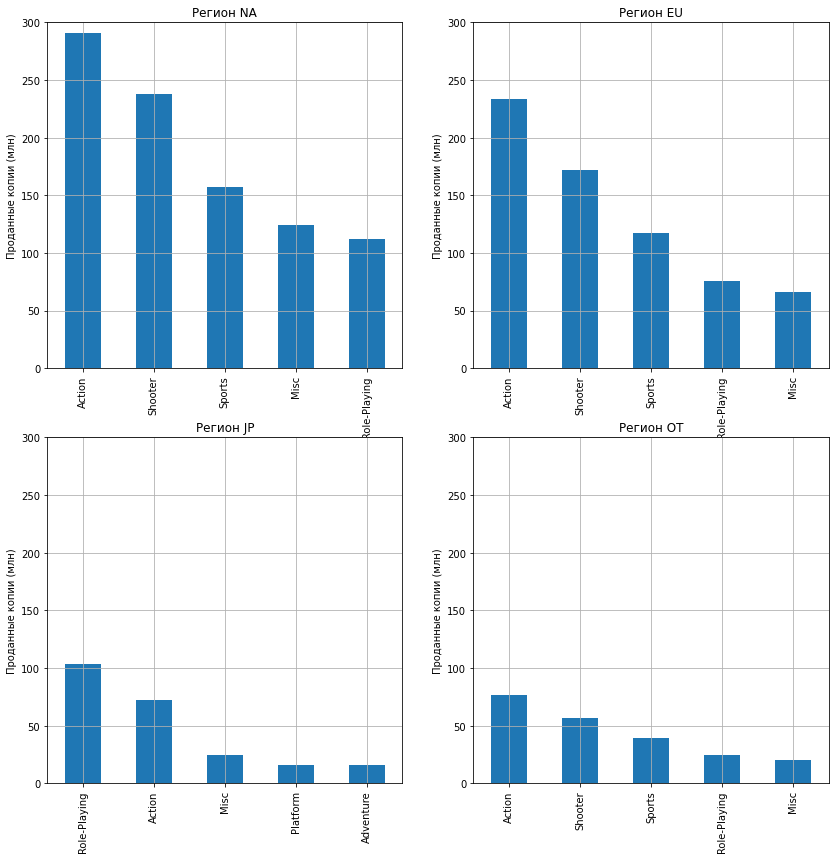

In [56]:
plt.figure(figsize=(14, 14))

for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    top_platforms = genre_regions[region].sort_values(ascending=False).head(5)
    top_platforms.plot(kind='bar', grid=True)
    
    plt.title('Регион {}'.format(region[:2].upper()))
    plt.xlabel('')
    plt.ylabel('Проданные копии (млн)')
    plt.ylim(0, 300)
    
plt.show()

Топ-3 популярных жанров полностью совпадает для Северной Америки и Европы. На 4  и 5 месте в Северной Америке находятся те же жанры, что и на 5 и 4 месте соответственно для Европы. Аналогично с платформами, Японий выделяется среди других регионов. Так, жанры Shooter и Sports (2 и 3 место в Америке и Европе) вовсе не вошли в топ-5 в Японии. Также в только топ-5 в Японии входят жанры Platform и Adventure. Таким образом, можно говорить, что предпочтения игроков в Японии сильно отличаются от предпочтений игроков из других регионов.

<div class="alert alert-info">
Популярность платформы 3DS в Японии можно объяснить тем, что ее производитель Nintendo - японская компания. Возможно, ее приобретение выгоднее, либо под нее выходит больше японских игр. Отличия в предпочтениях по жанрам игр может объясняться культурными различиями: разница в американской и европейской культуры не столь велика, как с японской.
</div>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе? <a class="anchor" id="section_4_3"></a> 

In [57]:
rating_regions = actual_data.pivot_table(index='rating', 
                                        values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                        aggfunc='sum')




In [58]:
print('Наиболее популярные жанры в Северной Америке:', 
      list(rating_regions.sort_values(by='na_sales', ascending=False)['na_sales'].index))
print('Наиболее популярные жанры в Европе:', 
      list(rating_regions.sort_values(by='eu_sales', ascending=False)['eu_sales'].index))
print('Наиболее популярные жанры в Японии:', 
      list(rating_regions.sort_values(by='jp_sales', ascending=False)['jp_sales'].index))



Наиболее популярные жанры в Северной Америке: ['M', 'E', 'T', 'E10+', 'doesnt have', 'EC', 'RP']
Наиболее популярные жанры в Европе: ['M', 'E', 'doesnt have', 'T', 'E10+', 'RP', 'EC']
Наиболее популярные жанры в Японии: ['doesnt have', 'E', 'T', 'M', 'E10+', 'EC', 'RP']


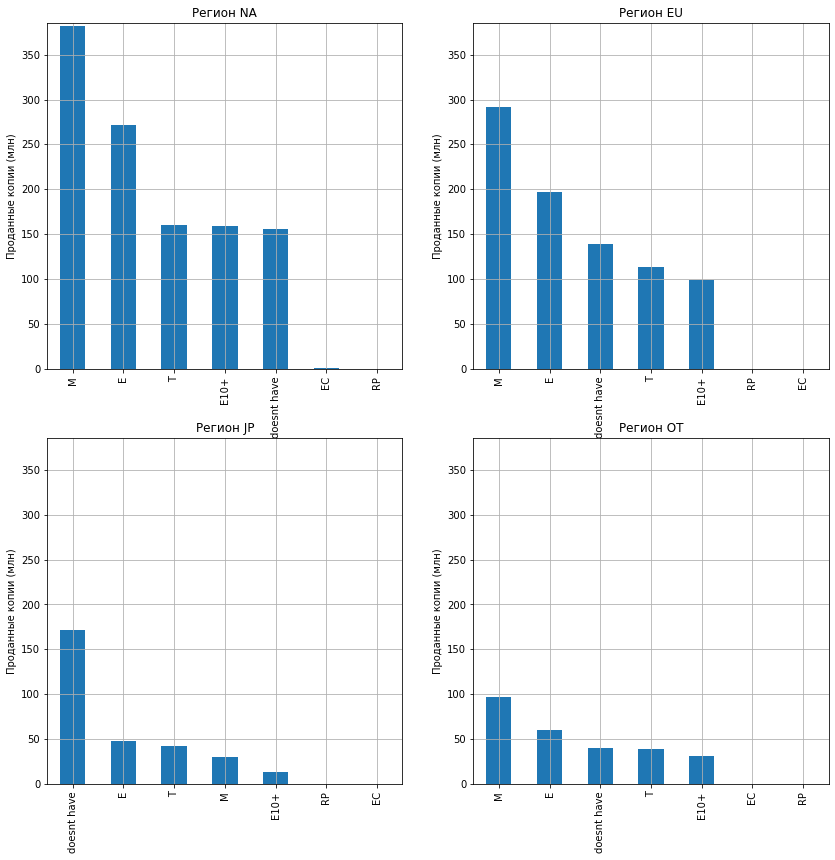

In [59]:
plt.figure(figsize=(14, 14))

for i, region in enumerate(regions, 1):
    plt.subplot(2, 2, i)
    top_platforms = rating_regions[region].sort_values(ascending=False).head(7)
    top_platforms.plot(kind='bar', grid=True)
    
    plt.title('Регион {}'.format(region[:2].upper()))
    plt.xlabel('')
    plt.ylabel('Проданные копии (млн)')
    plt.ylim(0, 385)
    
plt.show()

Реже всего во всех регионах приобретают игры с рейтингом «EC» («Early childhood») и «RP» («Rating Pending»). В этом нет ничего удивительного: чаще всего платформы используются не для развивающих игр для детей младшего возраста. Рейтинг «RP» используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу: можно предположить, что это новые игры, для которых можно оформить предзаказ. 

Как и в Европе, так и в Северной Америке наиболее популярные игры имеют рейтинг «M» («Mature») и «E» («Everyone»). Однако нельзя говорить, что именно рейтинг влияет на продажи той или иной игры. При выборе игры некоторые пользователи могут вовсе не интересоваться ее рейтингом, а обращать больше внимания на ее жанр или оценку критиков/других пользователей. Так, на 5 месте в Америке и на 3 в Европе расположены игры, для которых рейтинг вовсе не определен. Таким образом, отсутствие рейтинга ESRB не сказывается на том, что в каких-то регионах не покупают игры. 

Интересная ситуация для Японии: здесь на 1 месте расположились игры, не имеющие рейтинга. Можно предположить, что это связано с тем, что в Японии существует аналогичная организация, занимающаяся оценкой игр - Computer Entertainment Rating Organization (CERO). Она была создана в 2002 году, вероятно, игры выпущенные после этого года уже оценивались другой организацией. Таким образом, если рейтинг ESRB и влияет на продажи в отдельном регионе, то в Японии это влияние минимальное. Эта особенность еще выделяет японский рынок среди европейского и американского. 



#  5. Проверка гипотез <a class="anchor" id="chapter_5"></a> 

In [60]:
alpha = 0.05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a class="anchor" id="section_5_1"></a> 

В данном случае используем гипотезу о равенстве среднего двух генеральных совокупностей по взятым их низ выборкам.

In [61]:
sample_1 = actual_data.query('(platform == "XOne")', engine = 'python')['user_score']
sample_2 = actual_data.query('(platform == "PC")', engine = 'python')['user_score']
results = st.ttest_ind(sample_1, sample_2, nan_policy='omit')

In [62]:
print('Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
print('Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются')
print()

print('p-значение:', results.pvalue)
print('пороговое значение:', alpha)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: следовательно, средние пользовательские рейтинги платформ Xbox One и PC различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются

p-значение: 0.973402008980273
пороговое значение: 0.05
Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые


### Средние пользовательские рейтинги жанров Action и Sports разные. <a class="anchor" id="section_5_2"></a> 

In [63]:
sample_3 = actual_data.query('(genre == "Action")', engine = 'python')['user_score']
sample_4 = actual_data.query('(genre == "Sports")', engine = 'python')['user_score']
np.var(sample_3) , np.var(sample_4)

(1.95402222475512, 2.927422971367132)

In [64]:
results = st.ttest_ind(sample_3, sample_4, nan_policy='omit', equal_var=False)

In [65]:
print('Н0: cредние пользовательские рейтинги жанров Action и Sports одинаковые')
print('Н1: cредние пользовательские рейтинги жанров Action и Sports разные.')
print()

print('p-значение:', results.pvalue)
print('пороговое значение:', alpha)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: следовательно, cредние пользовательские рейтинги жанров Action и Sports различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports одинаковые')

Н0: cредние пользовательские рейтинги жанров Action и Sports одинаковые
Н1: cредние пользовательские рейтинги жанров Action и Sports разные.

p-значение: 2.606822877458764e-12
пороговое значение: 0.05
Отвергаем нулевую гипотезу: следовательно, cредние пользовательские рейтинги жанров Action и Sports различаются


# 6.  Общий вывод <a class="anchor" id="chapter_6"></a> 

За основу исследовательского анализа были взяты данные за период с 2010 по 2016 год. При планировании кампании на 2017 важно учитывать на какой регион она направлена. Было выяснено, что наиболее популярные платформы и жанры не сильно различаются в Северной Америке и Европе, в то время как в Японии популярны совсем другие жанры и платформы. Что касается рейтинга ESRB, то не было выявлено, что он оказывает влияние на продажи. 

Средняя продолжительность жизни платформы составляет около 10 лет. Соответственно, важно вкладываться в продвижение игр на тех платформах, которые глобально актуальны на 2016 год - PS4, XOne, 3DS. На этих платформах высокая оценка игры критиками, как правило, характерна для игр с высокими уровнем продаж; соответственно, стот обратить внимание на то, какую оценку получила игра от критиков. Высокая оценка пользователей же может быть у игр как с низкими, так и с высокими продажами. 

Также в ходе анализа была произведена проверка 2 гипотез: 1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2) Средние пользовательские рейтинги жанров Action и Sports разные. В первом случае не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Скорее всего пользовательский рейтинг зависит от конкретной игры, а не самой платформы, которая была выбрана игроком. 